### Some Theory

##### Types of data used for I/O:
- Text - '12345' as a sequence of unicode chars
- Binary - 12345 as a sequence of bytes of its binary equivalent

##### Hence there are 2 file types to deal with
- Text files - All program files are text files
- Binary Files - Images,music,video,exe files

### How File I/O is done in most programming languages

- Open a file
- Read/Write data
- Close the file

### Writing to a file

In [ ]:
# case 1 - if the file is not present
f = open('sample.txt','w')
f.write('Hello world')
f.close()
# since file is closed, this will not work
f.write('hello')

ValueError: I/O operation on closed file.

In [13]:
# write multiline strings
f = open('sample1.txt','w')
f.write('hello world')
f.write('\nhow are you?')
f.close()

In [14]:
# case 2 - if the file is already present
f = open('sample.txt','w')
f.write('salman khan')
f.close()

In [5]:
# how exactly open() works?

In [16]:
# Problem with w mode
# introducing append mode
f = open('sample1.txt','a')
f.write('\nI am fine')
f.close()

In [ ]:
d = {'apple': 1, 'banana': 7}

f = open('test.txt', 'w')
f.writelines(d)
f.close()

In [23]:
# write lines
L = ['hello\n','hi\n','how are you\n','I am fine', '1','2']

f = open('sample.txt','w')
f.writelines(L)
f.close()

In [25]:
with open('hello.txt', 'w') as wf:
    wf.write("This is one sentence")
    wf.write("\nSecond line ")

In [34]:
with open('hello.txt', "r") as rf:
    print(rf.read())


This is one sentence
Second line 


In [36]:
# reading from files
# -> using read()
f = open('sample.txt','r')
s = f.read() # Read whole file
print(s)
f.close()

hello
hi
how are you
I am fine12


In [37]:
# reading upto n chars
f = open('sample.txt','r')
s = f.read(10)
print(s)
f.close()

hello
hi
h


In [41]:
# readline() -> to read line by line
f = open('sample.txt','r')
print(f.readline(),end='') # frist line 
print(f.readline(),end='') # second line
f.close()

hello
hi


In [11]:
f = open('sample.txt', 'r')
f.readlines() # Return list of lines

['salman khan']

In [60]:
f = open('sample.txt', 'r')
count = 0
for line in f:
    count += 1

print(count)
f.read()

4


''

In [65]:
# reading entire using readline
f = open('sample.txt','r')

while True:

  data = f.readline()

  if data == '': # when read EOF (end of the file)
    break
  else:
    print(data,end='')


f.close()

hello
hi
how are you
I am fine12

### Using Context Manager (With)

- It's a good idea to close a file after usage as it will free up the resources
- If we dont close it, garbage collector would close it
- with keyword closes the file as soon as the usage is over

In [52]:
# with
with open('sample1.txt','w') as f:
  f.write('selmon bhai')

In [53]:
f.write('hello') # autoclose so, cant write after
# the close file

ValueError: I/O operation on closed file.

In [66]:
# try f.read() now
with open('sample.txt','r') as f:
  print(f.readline())

hello



In [67]:
# moving within a file -> 10 char then 10 char
with open('sample.txt','r') as f:
  print(f.read(10))
  print(f.read(10))
  print(f.read(10))
  print(f.read(10))

hello
hi
h
ow are you

I am fine
12


In [70]:
# benefit? -> to load a big file in memory
big_L = ['hello world ' for i in range(1000)]

with open('big1.txt','w') as f:
  f.writelines(big_L)


In [72]:
# now i want to load this big file 
# not whole file content at a time but, 
# only particular chunck of that file one by one

with open('big1.txt','r') as f:

  chunk_size = 10

  while len(f.read(chunk_size)) > 0:
    print(f.read(chunk_size),end='***')
    f.read(chunk_size)
    
## Have problem ||
              # VV

d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo***o world he***d hello wo**

In [9]:
# Above have problem,
# The while condition reads 10 characters but discards them.
# The print() statement reads the next 10 characters.
# Half of the file gets lost (every first 10-character 
# block is ignored).

## Better code, 
with open('big1.txt', 'r') as f:
    size = 10
    
    while True:
        chunk = f.read(size)
        if not chunk:  # Stop when there's nothing left to read
            break
        print(chunk, end='----')
        
### Why is this correct?
# Reads one chunk of data at a time.
# Stops when the file is empty.
# Does not skip any characters.

hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo world ----hello worl----d hello wo----rld hello ----world hell----o world he----llo wo

In [74]:
# seek and tell function
with open('sample.txt','r') as f:
  f.seek(15)
  print(f.read(10))
  print(f.tell())

  print(f.read(10))
  print(f.tell())

e you
I am
25
 fine12
32


In [22]:
with open('sample.txt', 'r') as f:
    print(f.tell()) # current file postion 
    print(f.read(10))
    print(f.tell())
    print(f.seek(0)) # reposition to 0 again
    print(f.read(10)) # read from start 0 till 10

0
{'name': '
10
0
{'name': '


In [ ]:
# seek during write
with open('sample.txt','w') as f:
  f.write('Hello')
  f.seek(0)
  f.write('Xa')

In [ ]:
with open('sample.txt', 'r') as rf:
    print(rf.read())
    print(rf.tell()) # current file point

Xallo
5


In [14]:
with open('big1.txt', 'r') as rf:
    for line in rf:
        print(line)


hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hello world hell

### Problems with working in text mode

- can't work with binary files like images, audio, videos
- not good for other data types like int/float/list/tuples

In [ ]:
# working with binary file
with open('screenshot1.png','r') as f:
  f.read()

UnicodeDecodeError: ignored

In [17]:
# Working with Binary file
with open('screenshot.png', 'rb') as f:
    print(f.read()) 

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\x14\x00\x00\x01P\x08\x06\x00\x00\x00&\xd58\xc2\x00\x00\x0c>iCCPICC Profile\x00\x00H\x89\x95W\x07XS\xc9\x16\x9e[\x92\x90@h\x01\x04\xa4\x84\xde\x04\xe9\x04\x90\x12B\x0b \xbd\x086B\x12 \x94\x18\x03A\xc5\x8e,*\xb8v\xb1\x80\r]\x15Q\xec\x80\xd8\x11\xc5\xc2"\xd8\xfb\x82\x88\x8a\xb2.\x16\xec\xca\x9b\x14\xd0u_\xf9\xde\xf9\xbe\xb9\xf7\xbf\xff\x9c\xf9\xcf\x99s\xe7\x96\x01@\xed4G$\xcaA\xd5\x01\xc8\x15\xe6\x8bcC\x02\xe8\xe3\x92S\xe8\xa4^\x80\x00\x14P\x80\x1e s\xb8y"ftt\x04\x806t\xfe\xbb\xbd\xbb\t\xbd\xa1]\xb3\x97j\xfd\xb3\xff\xbf\x9a\x06\x8f\x9f\xc7\x05\x00\x89\x868\x8d\x97\xc7\xcd\x85\xf80\x00x%W$\xce\x07\x80(\xe5\xcd\xa6\xe5\x8b\xa4\x186\xa0%\x86\tB\xbcH\x8a3\xe4\xb8R\x8a\xd3\xe4x\xbf\xcc\'>\x96\x05q3\x00J*\x1c\x8e8\x03\x00\xd5v\xc8\xd3\x0b\xb8\x19PC\xb5\x1fbG!O \x04@\x8d\x0e\xb1on\xee\x14\x1e\xc4\xa9\x10[C\x1f\x11\xc4R}F\xda\x0f:\x19\x7f\xd3L\x1b\xd6\xe4p2\x86\xb1|.2S\n\x14\xe4\x89r83\xfe\xcfr\xfco\xcb\xcd\x91\x0c\xc5\xb0\x84M%S\x1c\x1a+\x9d3\xac

In [19]:
# working with binary file
# creating copy of image
with open('screenshot.png','rb') as f: # rb - read binary
  with open('screenshot_copy.png','wb') as wf: # wb - write binary
    wf.write(f.read())

In [ ]:
with open ('screenshot.png', 'rb') as rb:
    with open('hello.png', 'wb') as wb:
        wb.write(rb.read())

In [ ]:
# working with a big binary file

In [ ]:
# working with other data types
with open('sample.txt','w') as f:
  f.write(5)

TypeError: ignored

In [23]:
with open('sample.txt','w') as f:
  f.write('5')

In [24]:
with open('sample.txt','r') as f:
  print(int(f.read()) + 5)

10


In [25]:
# more complex data
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('sample.txt','w') as f:
  f.write(str(d))

In [29]:
# Now, if i want to perform dictionary operation on save file,
# reconverting to dict

with open('sample.txt','r') as f:
  # print(dict(f.read()))
  print(f.read())
  print(type(f.read()))

# I can't do that,
# When you store a dictionary in a text file as a string,
# it is no longer a dictionary—it becomes a plain string.
# You must convert it back to a dictionary before 
# performing dictionary operations. -> Using Json format

# Like this, text mode save dict(f.read()) not allowed.



{'name': 'nitish', 'age': 33, 'gender': 'male'}
<class 'str'>


### Serialization and Deserialization

- **Serialization** - process of converting python data types to JSON format
- **Deserialization** - process of converting JSON to python data types

#### What is JSON?


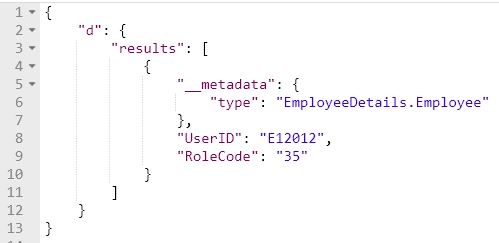

In [1]:
# serialization using json module
# list
import json # JavaScript Object Notation

L = [1,2,3,4]

with open('demo.json','w') as f:
  json.dump(L,f)


In [ ]:
# dict
d = {
    'name':'nitish',
     'age':33,
     'gender':'male'
}

with open('demo.json','w') as f:
  json.dump(d,f,indent=4)

In [2]:
# deserialization
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d)) # datatype doesn't loose as we loose in text mode

[1, 2, 3, 4]
<class 'list'>


In [3]:
# serialize and deserialize tuple
import json

t = (1,2,3,4,5)

with open('demo.json','w') as f:
  json.dump(t,f)

In [7]:
# serialize and deserialize a nested dict

d = {
    'student':'nitish',
     'marks':[23,14,34,45,56]
}

with open('demo.json','w') as f:
  json.dump(d,f)

### Serializing and Deserializing custom objects

In [17]:
class Person:

  def __init__(self,fname,lname,age,gender):
    self.fname = fname
    self.lname = lname
    self.age = age
    self.gender = gender

# format to printed in
# -> Nitish Singh age -> 33 gender -> male

In [18]:
person = Person('Nitish','Singh',33,'male')
print(person)

In [19]:
# direct dump like other datatype
with open('demo.json', 'w') as f:
    json.dump(person, f)

TypeError: Object of type Person is not JSON serializable

In [21]:
# As a string
import json

# show_object method specify our custome object format
def show_object(person):
  if isinstance(person,Person):
    return "name -> {} {} age -> {} gender -> {}".format(person.fname,person.lname,person.age,person.gender)

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object)

In [37]:
# As a dict
import json

def show_object(person):
  if isinstance(person,Person):
    return {'name':person.fname + ' ' + person.lname,'age':person.age,'gender':person.gender}

with open('demo.json','w') as f:
  json.dump(person,f,default=show_object,indent=4)

In [ ]:
# indent arrtribute
# As a dict

In [28]:
# deserializing
import json

with open('demo.json','r') as f:
  d = json.load(f)
  print(d)
  print(type(d))

{'name': 'Nitish Singh', 'age': 33, 'gender': 'male'}
<class 'dict'>


In [29]:
# set/tuple can't serialize 
import json
s = {1,2,111,22,2,1,11,111,111,222}
with open('demo.json', 'w') as f:
    json.dump(s,f,indent=5)


TypeError: Object of type set is not JSON serializable

### Summary

JSON is great for storing simple data like:
- Strings
- Numbers
- Lists
- Dictionaries (with string keys)

But JSON does NOT support complex Python objects like:

❌ Tuples

❌ Sets

❌ Custom Python Objects (Classes)

In [32]:
# Solution: Pickling which support any python object

### Pickling
`Pickling` is the process whereby a Python object hierarchy is converted into a byte stream, and `unpickling` is the inverse operation, whereby a byte stream (from a binary file or bytes-like object) is converted back into an object hierarchy.

Pickle can serialize any Python object, including: 

✔️ Tuples

✔️ Sets

✔️ Custom Python objects (classes & instances)

✔️ Functions (with limitations)

In [60]:
# Pickle allows serializing and deserializing Python objects
# into binary format.

class Person:
  
  def __init__(self,name,age):
    self.name = name
    self.age = age

  def display_info(self):
    print('Hi my name is',self.name,'and I am ',self.age,'years old')

In [61]:
p = Person('nitish',33)
p.display_info()


Hi my name is nitish and I am  33 years old


In [62]:
# pickle dump
import pickle
with open('person.pkl','wb') as f:
  pickle.dump(p,f)
# Dump(save) in binary format

In [65]:
# pickle load
# can access the object attribute and vairable if we want by 
# deserializing object, as we can't do above using json

import pickle
with open('person.pkl','rb') as f:
  p = pickle.load(f)

p.display_info()

Hi my name is nitish and I am  33 years old


### Pickle Vs Json

- Pickle lets the user to store data in binary format. JSON lets the user store data in a human-readable text format.